In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalAveragePooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
with open('artour.json') as artour:
  data = json.load(artour)

In [3]:
tags = []
inputs = []
outputs = {}
for intent in data['intents']:
  outputs[intent['tag']]=intent['output']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [4]:
data1 = pd.DataFrame({"inputs":inputs,
                      "tags":tags})

In [5]:
data1

,inputs,tags
0,hi,sapa
1,halo,sapa
2,hello,sapa
3,hallo,sapa
4,hey,sapa
...,...,...
144,bye,keluar
145,dadah,keluar
146,goodbye,keluar
147,sampai jumpa,keluar


In [6]:
import string
data1['inputs'] = data1['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data1['inputs'] = data1['inputs'].apply(lambda wrd: ''.join(wrd))
data1

,inputs,tags
0,hi,sapa
1,halo,sapa
2,hello,sapa
3,hallo,sapa
4,hey,sapa
...,...,...
144,bye,keluar
145,dadah,keluar
146,goodbye,keluar
147,sampai jumpa,keluar


In [7]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data1['inputs'])
train = tokenizer.texts_to_sequences(data1['inputs'])

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data1['tags'])

In [8]:
input_shape = x_train.shape[1]
print(input_shape)

7


In [9]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  143
output length:  20


In [10]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
train = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 8s 40ms/step - loss: 2.9962 - accuracy: 0.0470
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 2.9931 - accuracy: 0.0872
Epoch 3/200
5/5 [==============================] - 0s 9ms/step - loss: 2.9907 - accuracy: 0.1007
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 2.9881 - accuracy: 0.0940
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 2.9858 - accuracy: 0.1275
Epoch 6/200
5/5 [==============================] - 0s 9ms/step - loss: 2.9828 - accuracy: 0.1275
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 2.9796 - accuracy: 0.1342
Epoch 8/200
5/5 [==============================] - 0s 10ms/step - loss: 2.9764 - accuracy: 0.1342
Epoch 9/200
5/5 [==============================] - 0s 8ms/step - loss: 2.9722 - accuracy: 0.1342
Epoch 10/200
5/5 [==============================] - 0s 6ms/step - loss: 2.9675 - accuracy: 0.1342
Epoch 11/200
5/5 [========

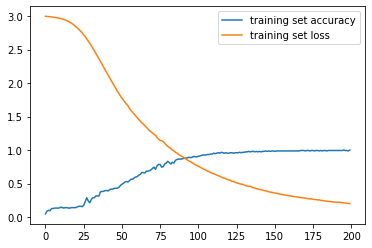

In [13]:
plt.plot(train.history['accuracy'], label='training set accuracy')
plt.plot(train.history['loss'], label='training set loss')
plt.legend()

In [14]:
import random
print("ARTour : Selamat Datang ARTourist!")

while True:
  texts_p = []
  prediction_input = input('You : ')
  #if prediction_input == 'keluar':
  #  print("ARTour : Terima kasih telah berkunjung :D, selamat menikmati liburan Anda~")
  #  break
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input], input_shape)

  output = model.predict(prediction_input)
  output = output.argmax()

  response_tag = le.inverse_transform([output])[0]
  print("ARTour : ", random.choice(outputs[response_tag]))
  #if response_tag < 0.5:
  #  print("ARTour : Maaf, bisa diulang pertanyaannya?")
  #  continue
  if response_tag == 'keluar':
    break

ARTour : Selamat Datang ARTourist!
ARTour :  Halo ARTourist!
ARTour :  Prambanan adalah candi Hindu terbesar dan termegah yang pernah dibangun di Jawa kuno, pembangunan candi Hindu kerajaan ini dimulai oleh Sri Maharaja Rakai Pikatan sebagai tandingan candi Buddha Borobudur dan juga candi Sewu yang terletak tak jauh dari Prambanan.
ARTour :  Lokasi Candi Prambanan : Jl. Raya Solo - Yogyakarta No.16, Kranggan, Bokoharjo, Kec. Prambanan, Kabupaten Sleman, Daerah Istimewa Yogyakarta 55571
ARTour :  Sendratari Ramayana digelar di Trimurti Theater Indoor
ARTour :  Abhayagiri Restaurant merupakan restoran fine dining berinterior Jawa tradisional yang berada di sekitar Prambanan. Lokasi tepatnya yakni di Heritage Resort, RT.02/RW.01, Sumberwatu, Sambirejo, Kecamatan Prambanan, Kabupaten Sleman, Yogyakarta.
ARTour :  Wedang Kopi Prambanan cocok untuk bersantai setelah capek jalan-jalan di Prambanan. Harga lauk prasmanannya antara Rp 5.000 - Rp 26.000. Sementara, untuk menu paket mulai dari Rp 